**Created by Berkay Alan**

**Linear Regression**

**19 July 2021**

**For more Tutorial:** https://github.com/berkayalan

## Content

- **Linear Methods for Regression**
    - What is Linear Regression?
    - Simple Linear Regression (Theory - Model- Tuning)
    - Multiple Linear Regression (Theory - Model- Tuning)
    - Least-Squares Regression(Ordinary Least Squares) (Theory - Model- Tuning)
    - Principal Component Analysis (PCA) 
    - Principal component regression(PCR) (Theory - Model- Tuning)
    - Shrinkage(Regularization) Methods
        - Partial Least Squares (Theory - Model- Tuning)
        - Ridge Regression(L2 Regularization) (Theory - Model- Tuning)
        - Lasso Regression(L1 Regularization) (Theory - Model- Tuning)
        - Elastic Net Regression (Theory - Model- Tuning)


## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Linear Regression by Yale University**](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)

- [**An introduction to simple linear regression**](https://www.scribbr.com/statistics/simple-linear-regression/)

- [**An introduction to Multiple linear regression**](https://www.scribbr.com/statistics/multiple-linear-regression/)

- [**How to Develop Elastic Net Regression Models in Python**](https://machinelearningmastery.com/elastic-net-regression-in-python/)

- [**Linear Regression for Machine Learning**](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

- [**Applied Data Mining and Statistical Learning by the PennState University**](https://online.stat.psu.edu/stat508/lesson/7/7.1)

- [**How to Calculate Principal Component Analysis (PCA) from Scratch in Python**](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)

- [**Validating your Machine Learning Model**](https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7)

- [**Understanding Confusion Matrix**](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

- [**Shrinkage methods by Stanford**](https://web.stanford.edu/class/stats202/notes/Model-selection/Shrinkage.html)

- [**Partial Least Squares regression by Xlstat**](https://www.xlstat.com/en/solutions/features/partial-least-squares-regression)

- [**Ridge Regression by Statquest**](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

- [**Lasso Regression by Statquest**](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

- [**Elastic Net Regression by Statquest**](https://www.youtube.com/watch?v=1dKRdX9bfIo&ab_channel=StatQuestwithJoshStarmer)

- [**Regularization: Ridge, Lasso and Elastic Net by Datacamp**](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

## Importing Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

## Linear Methods for Regression

A linear regression model assumes that the regression function E(Y |X) is linear in the inputs X1,...,Xp. Linear models were largely developed in the precomputer age of statistics, but even in today’s computer era there are still good reasons to study and use them. They are simple and often provide an adequate and interpretable description of how the inputs affect the output. 

### What is Linear Regression?

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

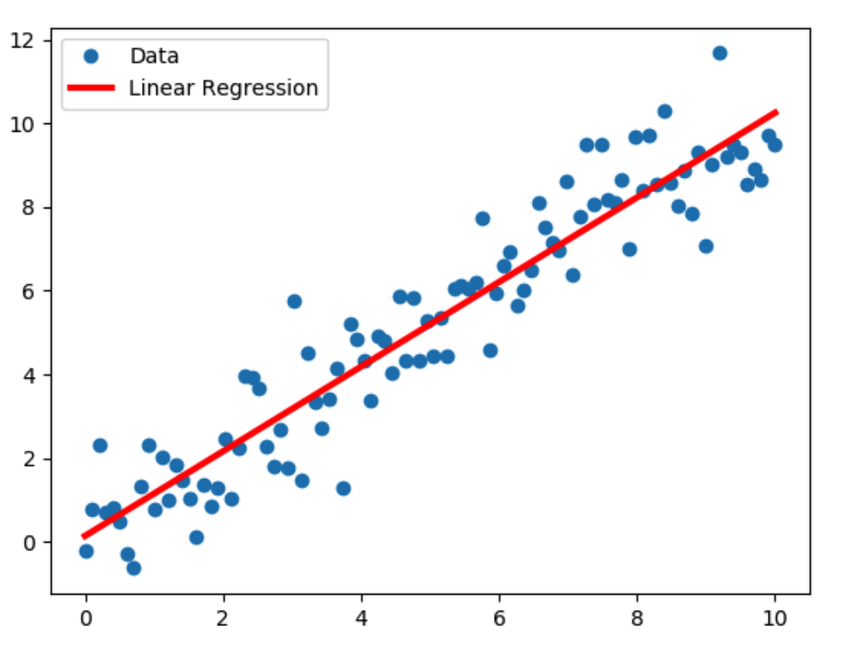

This image is cited by: https://www.researchgate.net/profile/Hieu-Tran-17/publication/340271573/figure/fig3/AS:874657431437319@1585545990533/Linear-Regression-model-sample-illustration.ppm

### Simple Linear Regression

#### Theory

Simple linear regression is used to estimate the relationship between two quantitative variables. We can use simple linear regression when WE want to know:

1. How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).

2. The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

**Example** 

I am a social researcher interested in the relationship between income and happiness. I survey 500 people whose incomes range from *$15k* to *$125k* and ask them to rank their happiness on a scale from 1 to 10.

My independent variable (income) and dependent variable (happiness) are both quantitative, so I can do a regression analysis to see if there is a linear relationship between them.

#### Model

For a real world example, we will use *advertising* dataset.

It can be downloaded from here: https://www.kaggle.com/ashydv/advertising-dataset

We will understand the dataset first.

In [ ]:
ads = pd.read_csv("../input/advertising-dataset/advertising.csv")

In [ ]:
ads.head()

In [ ]:
ads = ads[['TV', 'Radio', 'Newspaper', 'Sales']]

In [ ]:
ads.rename(columns={"Radio": "radio", "Newspaper": "newspaper","Sales": "sales"},inplace=True)

In [ ]:
ads.head()

In [ ]:
ads.describe().T

In [ ]:
ads.dtypes

In [ ]:
ads.shape

In [ ]:
ads.isna().sum()

Let's see correlations between variables.

In [ ]:
ads.corr()

Let's see correlations in pairplot.

In [ ]:
g= sns.pairplot(ads,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of Advertising Dataset", y=1.08)

plt.show()

In [ ]:
sns.jointplot(x="TV", y="sales",data=ads,kind="reg",color="green")

plt.show()

Now we will create a simple linear regression model by using **statsmodel** library.

In [ ]:
X = ads.TV
X = sm.add_constant(X) # It will add a constant to X.
X.head()

In [ ]:
y = ads.sales # Dependent Variable -Target

In [ ]:
slr = sm.OLS(y,X) 

In [ ]:
model = slr.fit()

In [ ]:
model.summary()

In [ ]:
model.params # Main parameters

In [ ]:
model.summary().tables[1]

In [ ]:
model.conf_int()

In [ ]:
#Signifigant Level - P value

model.f_pvalue

In [ ]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

In [ ]:
model.fvalue

In [ ]:
model.tvalues

In [ ]:
#Sum of squares error of model

model.mse_model #This is very bad

In [ ]:
model.rsquared

In [ ]:
model.rsquared_adj

In [ ]:
#Predicted Values
model.fittedvalues[:5]

In [ ]:
#real values
y[:5]

In [ ]:
#Manual formula of our model
print("Sales: " , model.params[0] , "+ (TV*",model.params[1],")")

In [ ]:
ax = sns.regplot(ads["TV"],ads["sales"],ci=None,scatter_kws={"color":"purple"},marker="x")
ax.set_title("Sales:  7.03259 + TV*0.04753")
ax.set_ylabel("# of Sales")
ax.set_xlabel("Expenses for TV")

plt.show()

Now we will create a model with **sklearn** library.

In [ ]:
X = ads[["TV"]]
sm.add_constant(X)
y = ads["sales"]

In [ ]:
lr = LinearRegression()
model = lr.fit(X,y)

In [ ]:
model.coef_.item()

In [ ]:
model.intercept_

In [ ]:
model.score(X,y) #R Squared

In [ ]:
model.predict(X)[:10]

Let's predict a spesific value.

In [ ]:
model.predict([[20]])

In [ ]:
model.predict([[43],[20],[32]])

#### Residuals

In [ ]:
slr = sm.OLS(y,X) 
model = slr.fit()
model.summary()

In [ ]:
mean_square = mean_squared_error(y,model.fittedvalues)
mean_square

In [ ]:
rmse = np.sqrt(mean_square)
rmse

In [ ]:
results = pd.DataFrame({"Real": y, "Prediction": model.predict(X),
                        "Residuals": y -(model.predict(X)),
                        "Square of Residuals": (y -(model.predict(X)))**2})

In [ ]:
results.head(10)

In [ ]:
np.sum(results["Square of Residuals"]) # root mean_square error

In [ ]:
np.mean(results["Square of Residuals"]) # mean_square error

In [ ]:
model.resid[:10]

In [ ]:
plt.plot(model.resid,c="r")
plt.title("Plot of Residuals")
plt.show()

### Multiple Linear Regression

#### Theory

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

**Note:** In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

**Example**

You are a public health researcher interested in social factors that influence heart disease. You survey 500 towns and gather data on the percentage of people in each town who smoke, the percentage of people in each town who bike to work, and the percentage of people in each town who have heart disease.

Because you have two independent variables and one dependent variable, and all your variables are quantitative, you can use multiple linear regression to analyze the relationship between them.

#### Model

For a real world example, we will use *advertising* dataset.

It can be downloaded from here: https://www.kaggle.com/ashydv/advertising-dataset

We will understand the dataset first.

In [ ]:
ads = pd.read_csv("../input/advertising-dataset/advertising.csv")
ads.rename(columns={"Radio": "radio", "Newspaper": "newspaper","Sales": "sales"},inplace=True)

In [ ]:
ads = ads[['TV', 'radio', 'newspaper', 'sales']]
ads.head()

In [ ]:
ads.shape

Let's select all independent variables.

In [ ]:
X = ads.drop("sales",axis=1)
X.head()

Now we will select dependent variable.

In [ ]:
y = ads["sales"]
y[:5]

Now we will split our dataset as train and test set.

In [ ]:
ads.shape

In [ ]:
X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [ ]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

First we will create our model with **statsmodel**.

Rsquare is explanation rate. Results means we explain 0.98 of sales variable.

In [ ]:
mlr = sm.OLS(y_train,X_train)
model = mlr.fit()
model.summary()

Now we will create our model with **sklearn**.

In [ ]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [ ]:
print("Intercept of Model-Bias: ",model.intercept_)
print("Coefficients of Model: ",model.coef_)

In [ ]:
print("Sales:", model.intercept_ ," + ",
      model.coef_[0],"* TV +",
      model.coef_[1],"* Radio +",
      model.coef_[2],"* Newspaper")

#### Prediction

Let's predict a spesific value.

In [ ]:
model.predict(pd.DataFrame([[35],[20],[45]]).T).item()

In [ ]:
train_root_mean_square = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [ ]:
print("root_mean_square_error of Training Set: ",train_root_mean_square)

In [ ]:
test_root_mean_square = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [ ]:
print("root_mean_square_error of Test Set: ",test_root_mean_square)

#### Model Tuning

In [ ]:
X = ads.drop("sales",axis=1)
y = ads["sales"]

X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [ ]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [ ]:
model.score(X_train,y_train)

Let's calculate validated r2 score.

In [ ]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

In [ ]:
#Train Rsquare
cross_val_score(model,X_train,y_train,cv=20,scoring="r2").mean()

In [ ]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error"))

In [ ]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error")).mean()

In [ ]:
#Test Rsquare
cross_val_score(model,X_test,y_test,cv=20,scoring="r2").mean()

In [ ]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error"))

In [ ]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error")).mean()

### Least-Squares Regression(Ordinary Least Squares)

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

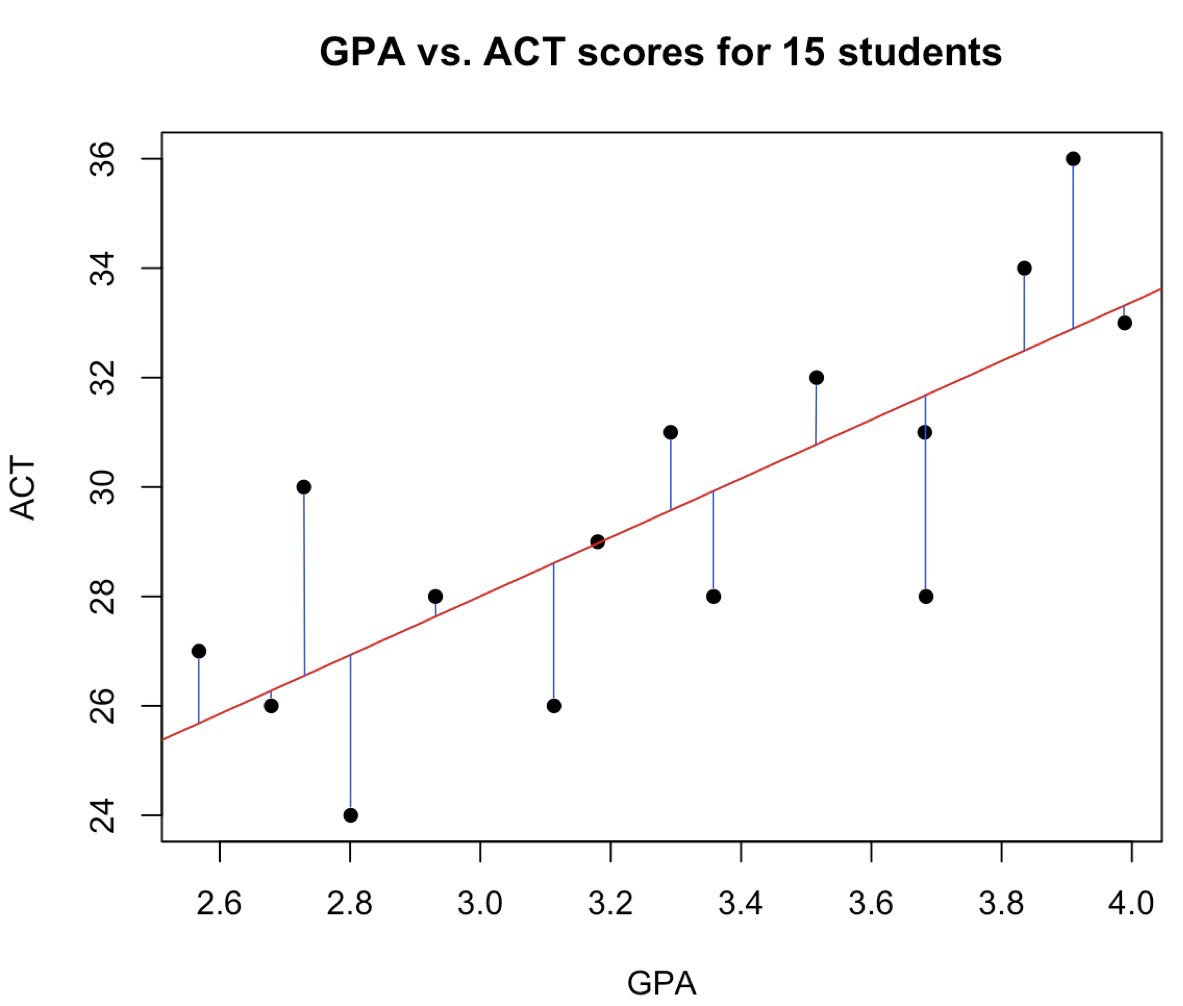

This photo is taken by: https://miro.medium.com/max/2366/1*tQkyTR9yxDcS1GKVFhdQQA.jpeg

### Principal Component Analysis (PCA) 

#### Theory

Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data.

It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

The PCA method can be described and implemented using the tools of linear algebra.

#### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
new_hts.head()

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train = X.iloc[:200]
X_test = X.iloc[200:]
y_train = y[:200]
y_test = y[200:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

Let's do dimensionality reduction.

In [ ]:
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [ ]:
X_reduced_train[:5]

Let's see cumulative explanatioon rates.

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

### Principal Component Regression(PCR)

#### Theory

In statistics, principal component regression (PCR) is a regression analysis technique that is based on principal component analysis (PCA). More specifically, PCR is used for estimating the unknown regression coefficients in a standard linear regression model.

We first perform principal components analysis (PCA) on the original data, then perform dimension reduction by selecting the number of principal components (m) using cross-validation or test set error, and finally conduct regression using the first m dimension reduced principal components.



#### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

Let's do dimensionality reduction.

In [ ]:
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

Let's see cumulative explanatioon rates.

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

Let's create a model.

In [ ]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)

In [ ]:
print("Intercept: ",pcr_model.intercept_)
print("Coefficients: ",pcr_model.coef_)

#### Prediction

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:10]

In [ ]:
#root mean square error for Train Set
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
#r2 score for Train Set
r2_score(y_train,y_pred)

In [ ]:
y_pred = pcr_model.predict(X_reduced_test)
y_pred[:10]

In [ ]:
#root mean square error for Test Set
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
#r2 score for Test Set
r2_score(y_test,y_pred)

#### Model Tuning

In [ ]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)
y_pred = pcr_model.predict(X_reduced_test)
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Let's try different dimensions.

In [ ]:
pcr_model = pcr.fit(X_reduced_train[:,:3],y_train)
y_pred = pcr_model.predict(X_reduced_test[:,:3])
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
cross_val = model_selection.KFold(n_splits=7,
                                  shuffle=True,
                                  random_state=45)
pcr = LinearRegression()
Root_mean_sqaure_error = []

In [ ]:
X_reduced_train.shape

In [ ]:
for num in np.arange(X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(pcr,X_reduced_train[:,:num],y_train.ravel(),
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

In [ ]:
plt.plot(Root_mean_sqaure_error,"-v",c="r")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PCR Model Tuning")

plt.show()

Optimum value seems 6. Now we will create a model with 6 components.

In [ ]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train[:,:6],y_train)

In [ ]:
y_pred = pcr_model.predict(X_reduced_train[:,:6])
print("Root mean square error for Train set: ",np.sqrt(mean_squared_error(y_train,y_pred)))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test[:,:6])
print("Root mean square error for Text set: ",np.sqrt(mean_squared_error(y_test,y_pred)))

### Shrinkage(Regularization) Methods

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Partial Least Squares, Ridge Regression, Lasso Regression, and Elastic Net, which implement four different ways to constrain the weights.

#### Partial Least Squares (PLS)

##### Theory

Partial Least Squares regression (PLS) is a quick, efficient and optimal regression method based on covariance. It is recommended in cases of regression where the number of explanatory variables is high, and where it is likely that the explanatory variables are correlated.

PLS helps to handle the case of a large number of correlated independent variables, which is common in chemometrics. Itis an alternative to ordinary least squares (OLS) regression. Firstly it extracts a set of latent factors that explain as much of the covariance as possible between the independent and dependent variables. Then a regression step predicts values of the dependent variables using the decomposition of the independent variables.

PLS is a supevised dimensiion reduction method.

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
pls_model = PLSRegression(n_components=7).fit(X_train,y_train)

In [ ]:
pls_model.coef_

##### Prediction

In [ ]:
pls_model

In [ ]:
X_train.head()

In [ ]:
pls_model.predict(X_train)[:10]

In [ ]:
y_pred=pls_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=pls_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

##### Model Tuning

In [ ]:
pls_model

In [ ]:
cross_val = model_selection.KFold(n_splits=15,
                                  shuffle=True,
                                  random_state=45)
Root_mean_sqaure_error = []

In [ ]:
for num in np.arange(1,X_train.shape[1]+1):
    pls= PLSRegression(n_components=num)
    score = np.sqrt(-1*model_selection.cross_val_score(pls,X_train,y_train,
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

In [ ]:
len(Root_mean_sqaure_error)

In [ ]:
X_train.shape[1]

In [ ]:
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(Root_mean_sqaure_error),"-v",c="g")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PLS Model Tuning")

plt.show()

Now we will create our last model with optimal value that seems 8.

In [ ]:
pls_model = PLSRegression(n_components=8).fit(X_train,y_train)

In [ ]:
y_pred=pls_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=pls_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

#### Ridge Regression ( L2 Regularization)

##### Theory

Ridge Regression is a regularized version of Linear Regression. Ridge Regression, like Linear Regression, aims to minimize the Residual Sum of Squares(RSS) but with a slight change. While Linear Regression estimates the coefficients using the values that minimize the following equation:

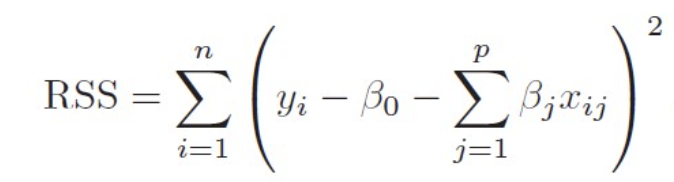

Photo is cited by here: http://busigence.com/blog/shrinkage-methods-in-linear-regression/

Ridge Regression adds a **penalty term(lambda 𝜆)** to this to shrink the coefficients to 0 :

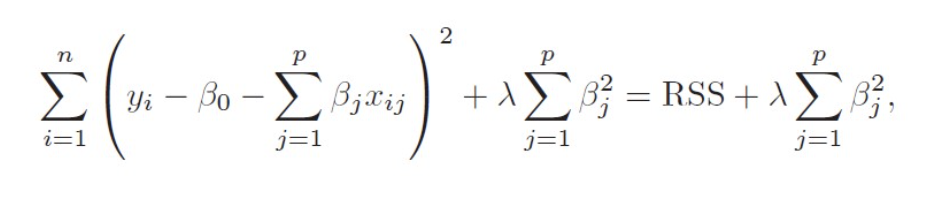

Photo is cited by here: http://busigence.com/blog/shrinkage-methods-in-linear-regression/

The hyperparameter *lambda(𝜆)* controls how much we want to regularize the model. If  𝜆 = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
ridge_model = Ridge(alpha=0.2).fit(X_train,y_train)

In [ ]:
ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
ridge_model = Ridge()
coefficients = []

for lam in lambda_values:
    ridge_model.set_params(alpha=lam)
    ridge_model.fit(X_train,y_train)
    coefficients.append(ridge_model.coef_)

In [ ]:
lambda_values[:10]

In [ ]:
coefficients[:3]

In [ ]:
ax = plt.gca()
ax.plot(lambda_values,coefficients)
ax.set_xscale("log")

plt.xlabel("Lambda Values")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients")
plt.show()

##### Prediction

In [ ]:
ridge_model

In [ ]:
ridge_model.predict(X_train)[:10]

In [ ]:
y_pred=ridge_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=ridge_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

##### Model Tuning

In [ ]:
lambda_values= 10**np.linspace(5,-2,150)*0.5

In [ ]:
lambda_values[:10]

In [ ]:
Ridge_cv = RidgeCV(alphas=lambda_values,
                   scoring="neg_mean_squared_error",
                   normalize=True)

In [ ]:
Ridge_cv.fit(X_train,y_train)

In [ ]:
Ridge_cv.alpha_

Now we will create our last model with optimal alpha value that seems 0.009568617603791272.

In [ ]:
ridge_tuned = Ridge(alpha=Ridge_cv.alpha_,normalize=True).fit(X_train,y_train)

In [ ]:
y_pred=ridge_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=ridge_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

#### Lasso Regression( L1 Regularization)

##### Theory

Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm. This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

This is the cost function of Lasso regression:

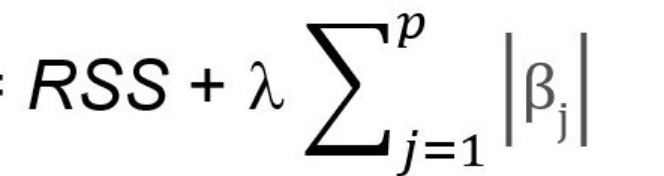

Photo is cited by: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fgeekculture%2Fridge-and-lasso-regression-51705b608fb9&psig=AOvVaw2KdB1GWJI9AWSkW5SyaXKy&ust=1626716220613000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJCY8YOV7fECFQAAAAAdAAAAABAD

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

In [ ]:
lasso_model

In [ ]:
lasso_model.coef_

In [ ]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
lasso_model = Lasso()
coefficients = []

for lam in lambda_values:
    lasso_model.set_params(alpha=lam)
    lasso_model.fit(X_train,y_train)
    coefficients.append(lasso_model.coef_)

In [ ]:
ax = plt.gca()
ax.plot(lambda_values*2,coefficients)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("Lambda Values - Alpha")
plt.ylabel("Coefficients - Weights")
plt.title("Lasso Coefficients")
plt.show()

##### Prediction

In [ ]:
lasso_model

In [ ]:
lasso_model.predict(X_train)[:10]

In [ ]:
y_pred=lasso_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=lasso_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

##### Model Tuning

In [ ]:
Lasso_cv = LassoCV(alphas=None,
                   cv=15,
                   max_iter=15000,
                   normalize=True)

In [ ]:
Lasso_cv.fit(X_train,y_train)

In [ ]:
Lasso_cv.alpha_

Now we will create our last model with optimal alpha value that seems 0.07340278835886885.

In [ ]:
lasso_tuned = Lasso(alpha=Lasso_cv.alpha_).fit(X_train,y_train)

In [ ]:
y_pred=lasso_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=lasso_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

#### Elastic Net Regression

##### Theory

Elastic-Net Regression is combines Lasso Regression with Ridge Regression to give you the best of both worlds. It works well when there are lots of useless variables that need to be removed from the equation and it works well when there are lots of useful variables that need to be retained. And it does better than either one when it comes to handling correlated variables. 

 Elastic Net aims at minimizing the following loss function:

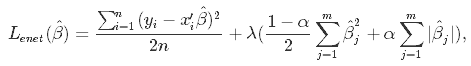

Photo is cited by: https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

In [ ]:
hts.describe().T

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
elastic_net_model = ElasticNet().fit(X_train,y_train)

In [ ]:
elastic_net_model

In [ ]:
elastic_net_model.coef_

In [ ]:
elastic_net_model.intercept_

##### Prediction

In [ ]:
elastic_net_model

In [ ]:
elastic_net_model.predict(X_train)[:10]

In [ ]:
y_pred=elastic_net_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=elastic_net_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

##### Model Tuning

In [ ]:
elastic_net_cv = ElasticNetCV(cv=15,random_state=42)

In [ ]:
elastic_net_cv.fit(X_train,y_train)

In [ ]:
elastic_net_cv.alpha_

Now we will create our last model with optimal alpha value that seems 1116.4729085556469.

In [ ]:
elastic_net_tuned = ElasticNet(alpha=elastic_net_cv.alpha_).fit(X_train,y_train)

In [ ]:
y_pred=elastic_net_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=elastic_net_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

### Summary



| Model | Train Error | Test Error |
| --- | --- | --- |
| Partial Least Squares(PLS) | 309.05 | 330.64 |
| Ridge Regression(L2 Regularization) | 306.60 | 327.87 |
| Lasso Regression(L1 Regularization) | 303.25 | 336.56 |
| Elastic Net Regression | 326.91 | 328.92 |
